<a href="https://colab.research.google.com/github/ola8484/DM/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2- Explore the dataset, make some **statistics** about it and explain them.

3- What are the required preprocessing techniques you applied, explain why?

a. Your project must include charts that describe the dataset and evaluation you did.

b. If you drop some attributes from the model building process, explain why.

# 2.1 - Attributes :

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22) 

4 `address` - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart) 

7 `Medu` - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 `Fedu` - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other") 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 
to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 `higher` - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 `romantic` - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93) 

# Grades :

Grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

we'll try to predict if the student final grade will be enough to be approved.

???But, we'll then try to check if the performance in one subject affects the other one.???


*For a Final Grade >10 the studen will succeed.*

---
---

# 2.2 Statistics :

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df_math = pd.read_csv("student-mat.csv")

In [ ]:
df_port = pd.read_csv("student-por.csv")

In [ ]:
# Data information
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Data information
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
# look for missing values
df_math.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
# look for missing values
df_port.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
# Statistical information
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Statistical information
df_port.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# 2.3 - Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

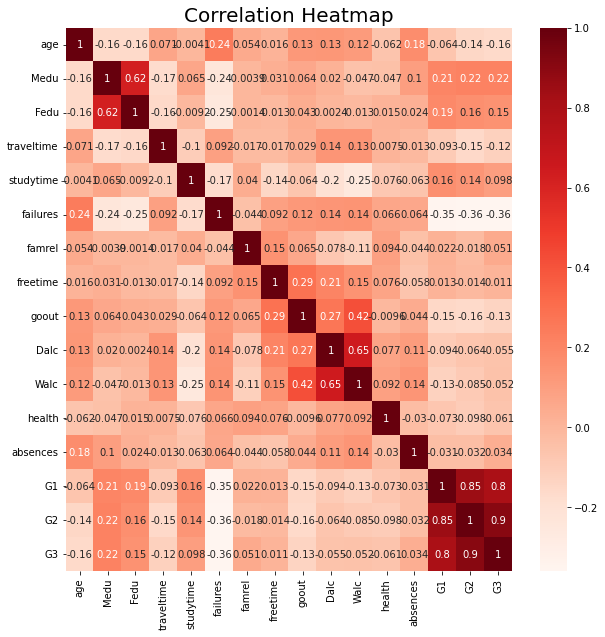

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df_math.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

Text(0.5, 1.0, 'Correlation Heatmap')

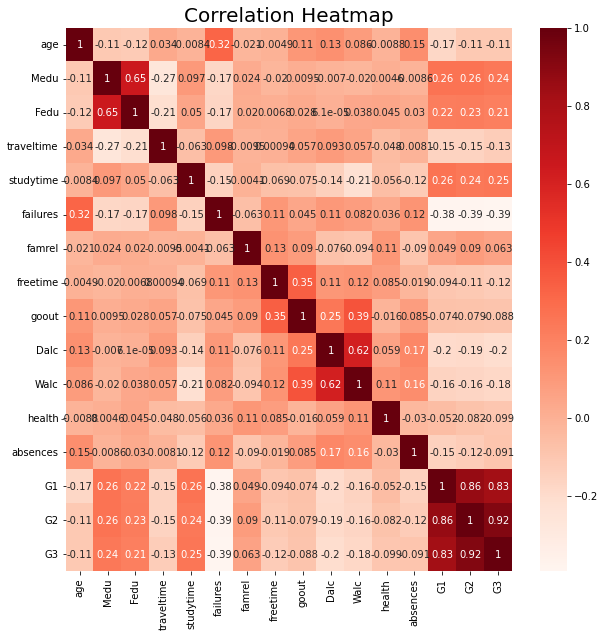

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df_port.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [ ]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


---
---

check some data with relation to the final grade.

# 3 - Data Check

In [ ]:
import seaborn as sns

---

#      3.1 - Features - Sex

We can see a difference in both subjects for male and female.

Female tend to perform better in Portuguse,

while Male tend to perform better in Math.

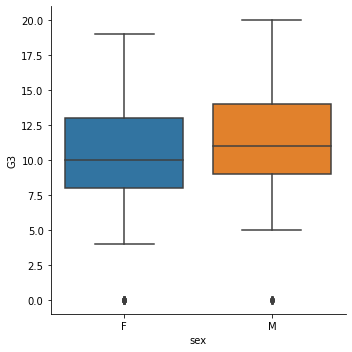

In [ ]:
sns.catplot(x="sex",y="G3",kind="box",data=df_math)

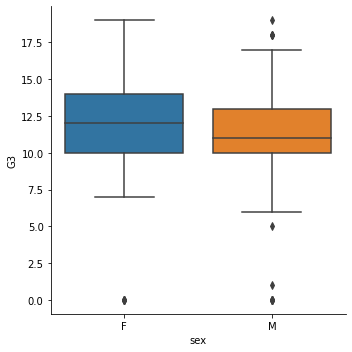

In [ ]:
sns.catplot(x="sex",y="G3",kind="box",data=df_port)

---

#      3.2 - Features - Age

There's a very similar approval rate for ages 15-18. 

And then start varying from >19. 

and small grades for 22 

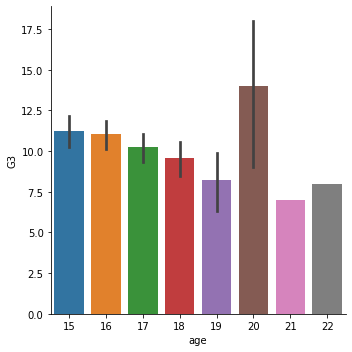

In [ ]:
sns.catplot(x="age",y="G3",kind="bar",data=df_math)

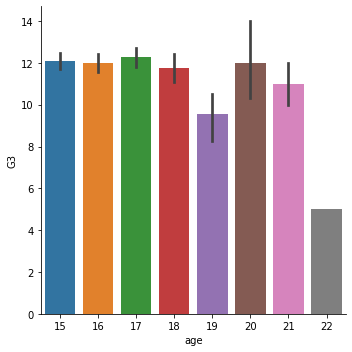

In [ ]:
sns.catplot(x="age",y="G3",kind="bar",data=df_port)

---

#     3.3 - Features - School 
`School feature will be removed`

From this analysis , it seems that the school from where the student participate does not affect the grade at all,

* Both schools have a close Math mean
* Both schools have very similar Math Std,

* despite having a higher mean grade, GP School also have a higher std

    *they have a high std (this may affect the model performance),
    meaning that many students will fail in math.*

In [ ]:
df_math['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [ ]:
df_math[['school','G3']].groupby(df_math['school'],as_index=True).mean()


,G3
school,
GP,10.489971
MS,9.847826


In [ ]:
df_math[['school','G3']].groupby(df_math['school'],as_index=True).std()


,G3
school,
GP,4.625397
MS,4.237229


### Let's check with portuguese

In [ ]:
df_port['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [ ]:
df_port[['school','G3']].groupby(df_port['school'],as_index=True).mean()

,G3
school,
GP,12.576832
MS,10.650442


In [ ]:
df_port[['school','G3']].groupby(df_port['school'],as_index=True).std()

,G3
school,
GP,2.625636
MS,3.833991


In Portuguese, students have a higher mean grade and a smaller standart deviation, we expect less students to fail in potuguese.

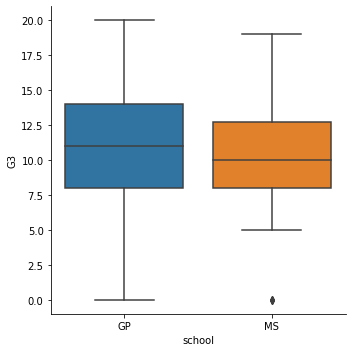

In [ ]:
sns.catplot(x="school",y="G3", kind="box",data=df_math)

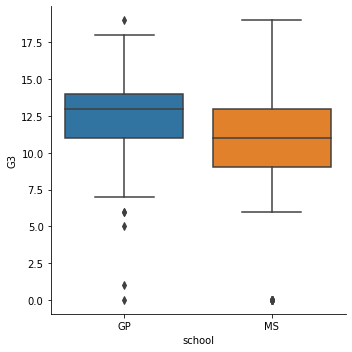

In [ ]:
sns.catplot(x="school",y="G3", kind="box",data=df_port)

---

# 3.4 - Features - Address

 Rural students tend to perform a bit worse.

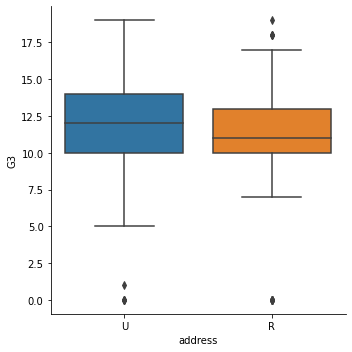

In [ ]:
sns.catplot(x="address",y="G3", kind="box",data=df_port)

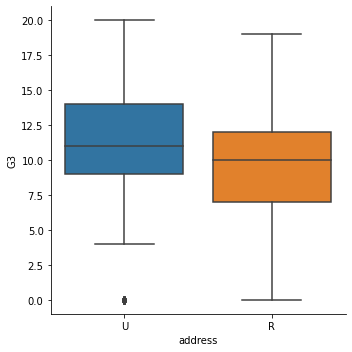

In [ ]:
sns.catplot(x="address",y="G3", kind="box",data=df_math)



---

# 3.5 - Features - Family Size

*`famsize will be removed`*

*Despite having a higher variance for family with more than 3 members in math. This feature seems to not be useful, there's no great differente between students with different family sizes (Specially in Portuguese).*

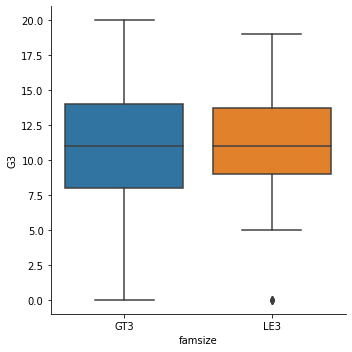

In [ ]:
sns.catplot(x="famsize",y="G3", kind="box",data=df_math)

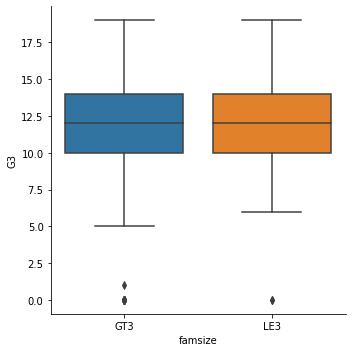

In [ ]:
sns.catplot(x="famsize",y="G3", kind="box",data=df_port)

---

# 3.6 - Features - Parental Status

*math has a higher variance, but very close mean.*

*`Pstatus will be removed`*

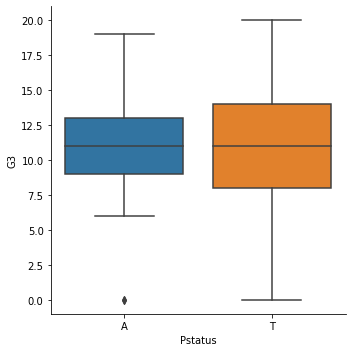

In [ ]:
sns.catplot(x="Pstatus",y="G3", kind="box",data=df_math)

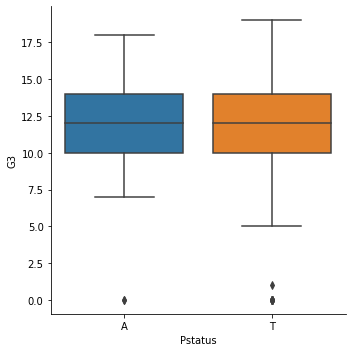

In [ ]:
sns.catplot(x="Pstatus",y="G3", kind="box",data=df_port)

---

# 3.7 - Features - Mother Education 

*It seems that the greater the mother education, the student has greater grades.*

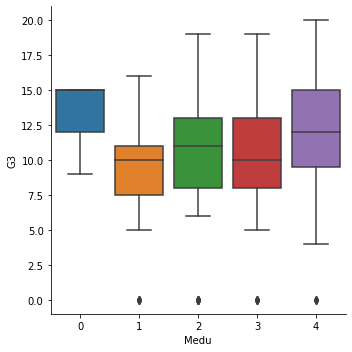

In [ ]:
sns.catplot(x="Medu",y="G3", kind="box",data=df_math)

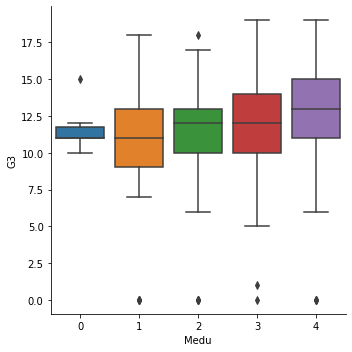

In [ ]:
sns.catplot(x="Medu",y="G3", kind="box",data=df_port)

---

# 3.8 - Features - Father Education influence

*It seems that the greater the Father education, the student has greater grades.*

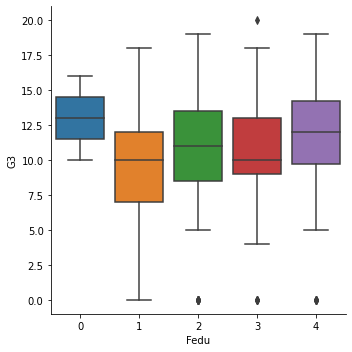

In [ ]:
sns.catplot(x="Fedu",y="G3", kind="box",data=df_math)

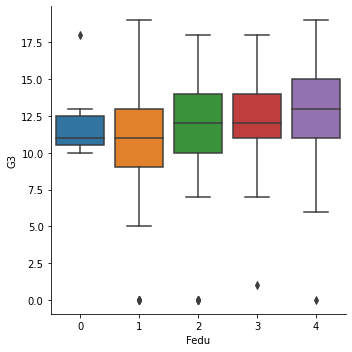

In [ ]:
sns.catplot(x="Fedu",y="G3", kind="box",data=df_port)

---

# 3.9 - Features - Mother Job

*Surely the mother influence the grade of a student*

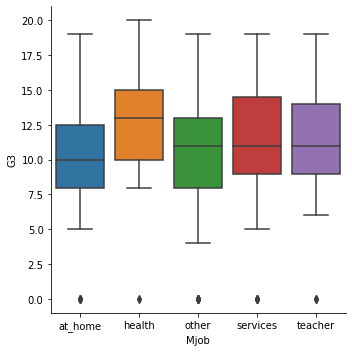

In [ ]:
sns.catplot(x="Mjob",y="G3", kind="box",data=df_math)

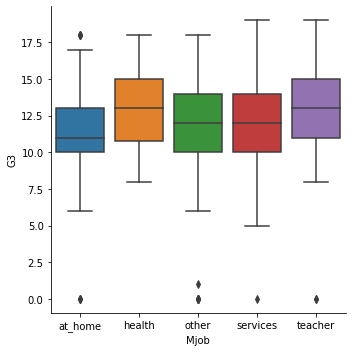

In [ ]:
sns.catplot(x="Mjob",y="G3", kind="box",data=df_port)

---

# 3.10 - Features - Father Job

*The father job has a less difference in most jobs, but it takes a nice increase in both Portuguese and Math. We'll convert teacher as one category and the rest as other.*


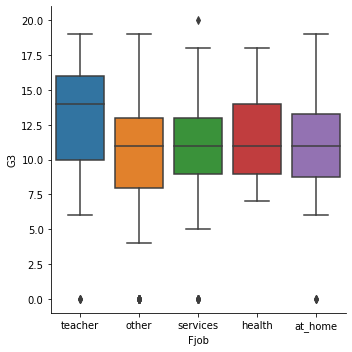

In [ ]:
sns.catplot(x="Fjob",y="G3", kind="box",data=df_math)

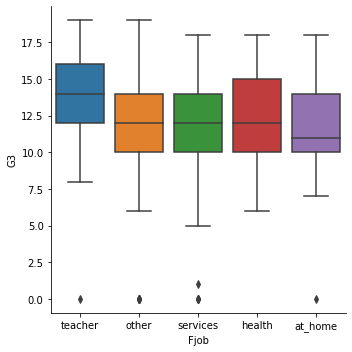

In [ ]:
sns.catplot(x="Fjob",y="G3", kind="box",data=df_port)

---

# 3.11 - Features - Reason

*Despite having a different mean in portuguese,it doesn't in math , 

`we'll remove this feature` 

it doesn't add significance to the model*

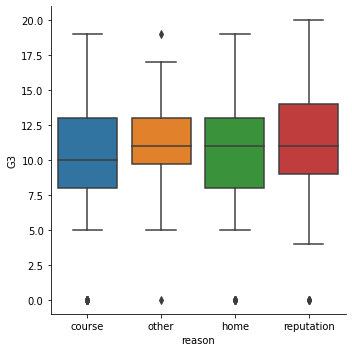

In [ ]:
sns.catplot(x="reason",y="G3", kind="box",data=df_math)

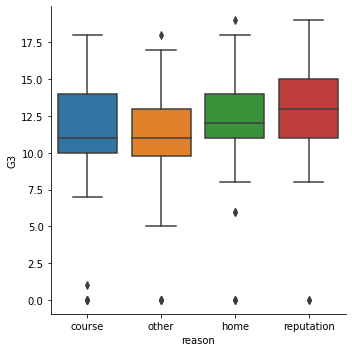

In [ ]:
sns.catplot(x="reason",y="G3", kind="box",data=df_port)

---

# 3.12 - Features - Guardian

*We can clearly see that the mean grade of the student decrease if "others" are guardian, also means are very similar if either mother and father are the guardian.*

*we Keep feature,but edit grouping mother and father*

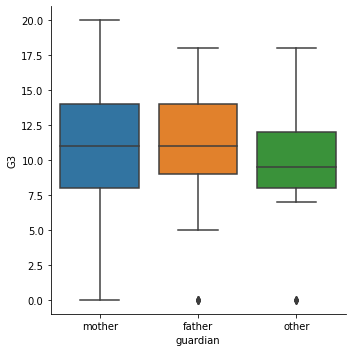

In [ ]:
sns.catplot(x="guardian",y="G3", kind="box",data=df_math)

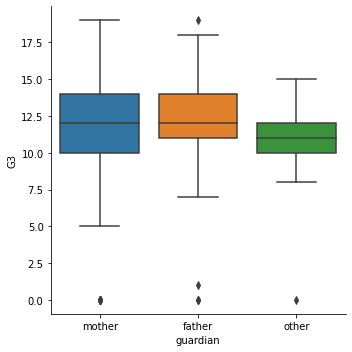

In [ ]:
sns.catplot(x="guardian",y="G3", kind="box",data=df_port)

---


# 3.13 - Feature - Travel time

There's no significant difference if the student take more than 15 minutes to arrive the school (2,3,4 are close in mean)

`so we'll remove this feature` .



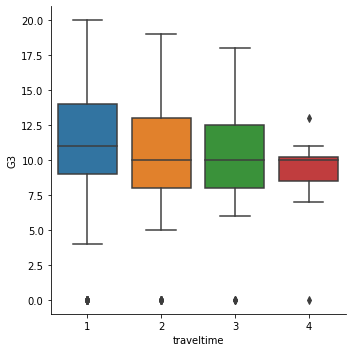

In [ ]:
sns.catplot(x="traveltime",y="G3", kind="box",data=df_math)

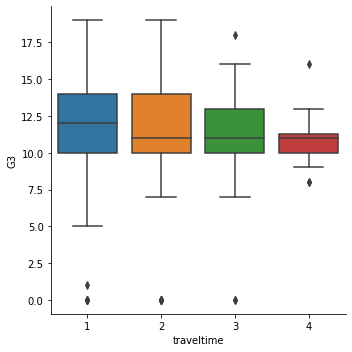

In [ ]:
sns.catplot(x="traveltime",y="G3", kind="box",data=df_port)

---

# 3.14 - Features - Study Time


*As we imagined, the more the student study higher the grade. But after 3 (5-10 hours) there's no significant improvement on the grade.*
*so we Keep feature, but group 3,4 into 3*


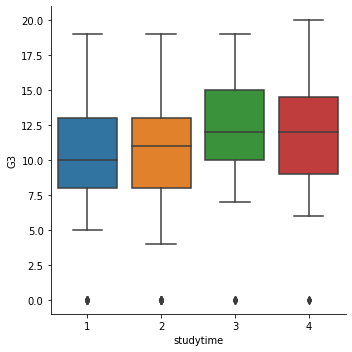

In [ ]:
sns.catplot(x="studytime",y="G3", kind="box",data=df_math)

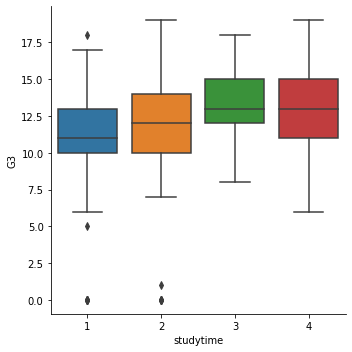

In [ ]:
sns.catplot(x="studytime",y="G3", kind="box",data=df_port)

---

# 3.15 - Features - Failures

*The less the student fails, the bigger the grade.*
*we Keep this feature, but watch out because math data has a huge variance for more than 2 failures.*


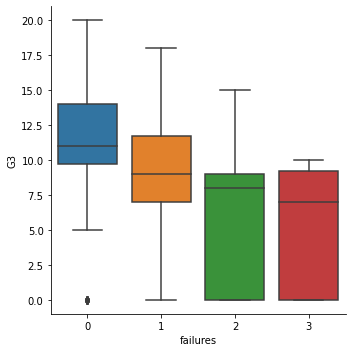

In [ ]:
sns.catplot(x="failures",y="G3", kind="box",data=df_math)

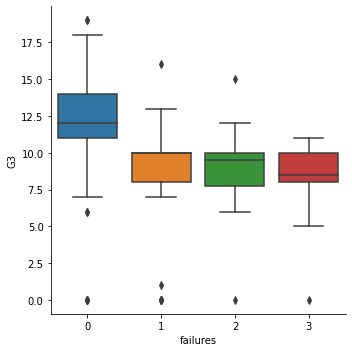

In [ ]:
sns.catplot(x="failures",y="G3", kind="box",data=df_port)

---

# 3.16 - Features - School Support

*The students that have a lower grade, obviusly need more school support. We'll keep this feature.*

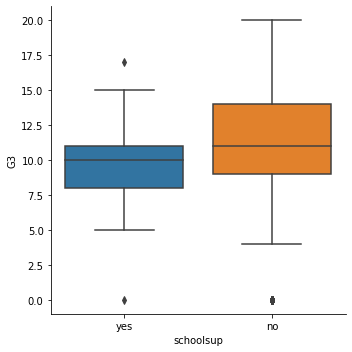

In [ ]:
sns.catplot(x="schoolsup",y="G3", kind="box",data=df_math)

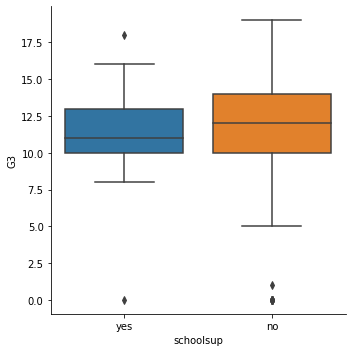

In [ ]:
sns.catplot(x="schoolsup",y="G3", kind="box",data=df_port)

---

# 3.17 - Features - Family Support

*There's no big difference for students who had family education support and those who hadn't.*

*`so we'll Removed famsup feature`*

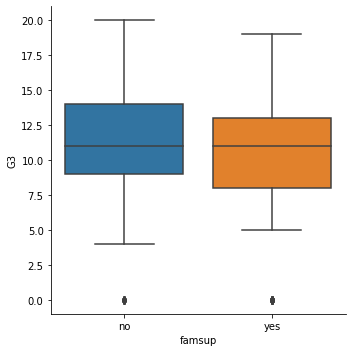

In [ ]:
sns.catplot(x="famsup",y="G3", kind="box",data=df_math)

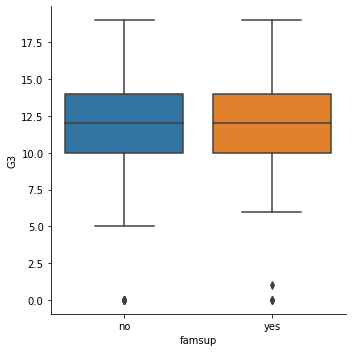

In [ ]:
sns.catplot(x="famsup",y="G3", kind="box",data=df_port)

---

# 3.18 - Features - Extra Paid Classes 

 *the mean is the same, despite the smaller variance for those who paid,*
 
  *`so we'll removed this feature.`*

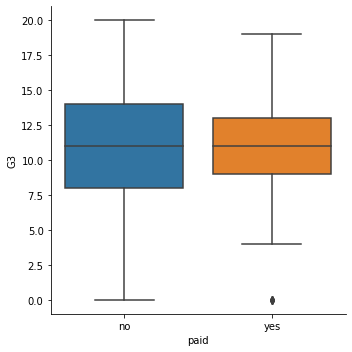

In [ ]:
sns.catplot(x="paid",y="G3", kind="box",data=df_math)

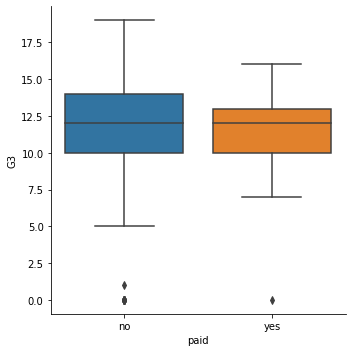

In [ ]:
sns.catplot(x="paid",y="G3", kind="box",data=df_port)

---

# 3.19 - Features - Extra Activities

*The feature doesn't seem to add on the math data, but do in the port data.*

`so we removed this feature`

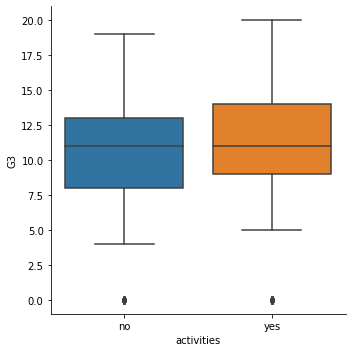

In [ ]:
sns.catplot(x="activities",y="G3", kind="box",data=df_math)

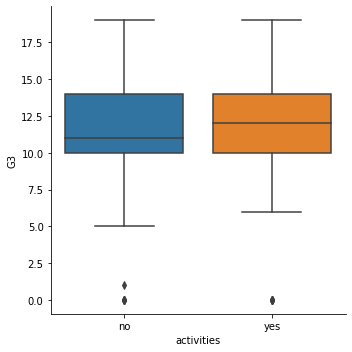

In [ ]:
sns.catplot(x="activities",y="G3", kind="box",data=df_port)

---

# 3.20 - Features - Nursery School

*The feature doesn't seem to add on the math data, but do in the port data.*

`so we removed this feature`

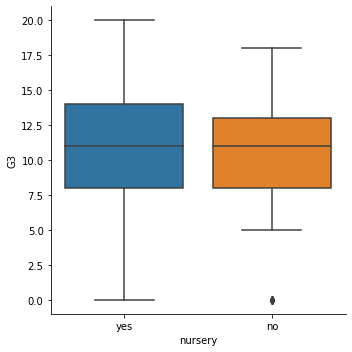

In [ ]:
sns.catplot(x="nursery",y="G3", kind="box",data=df_math)

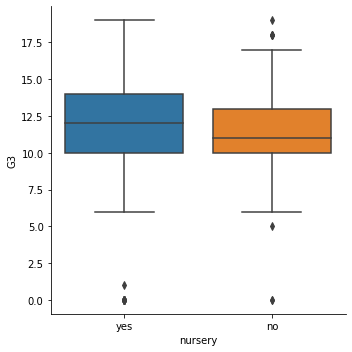

In [ ]:
sns.catplot(x="nursery",y="G3", kind="box",data=df_port)

---

# 3.21 Features - Higher Education
*Those who want higher education are clearly doing better*

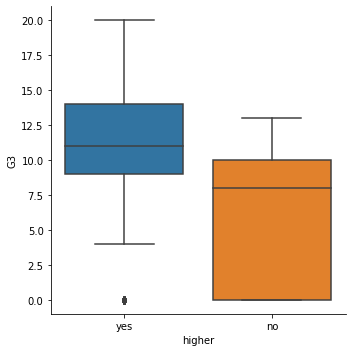

In [ ]:
sns.catplot(x="higher",y="G3", kind="box",data=df_math)

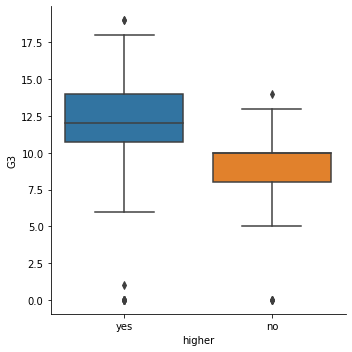

In [ ]:
sns.catplot(x="higher",y="G3", kind="box",data=df_port)

# 3.22 Features - Internet Acess

*The internet acess has a positive influence in the final grade of a student.*

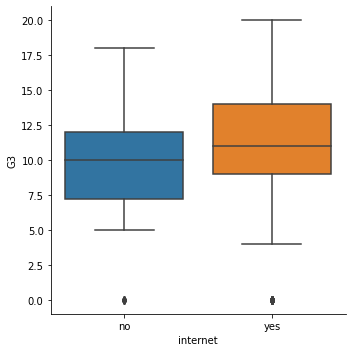

In [ ]:
sns.catplot(x="internet",y="G3", kind="box",data=df_math)

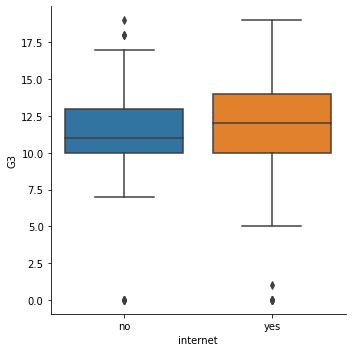

In [ ]:
sns.catplot(x="internet",y="G3", kind="box",data=df_port)

# 3.23 - Features - Romantic Relationship

*The romantic feature doesn't add much to the model, it makes no difference if the person is either in a relation or not.*

*`we we'llRemove romantic`*


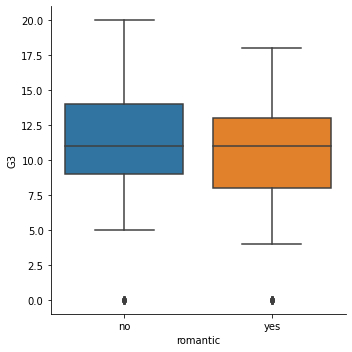

In [ ]:
sns.catplot(x="romantic",y="G3", kind="box",data=df_math)

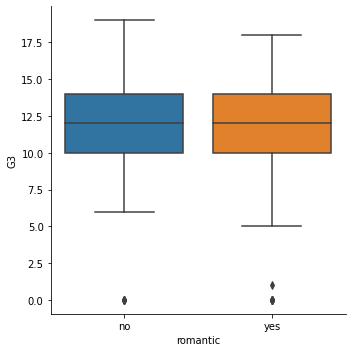

In [ ]:
sns.catplot(x="romantic",y="G3", kind="box",data=df_port)

# 3.24 - Features - Family Relationship 
*It seems that there's no huge between a bad and an excellent family relation.*

*`so we'll reemoved feature`*

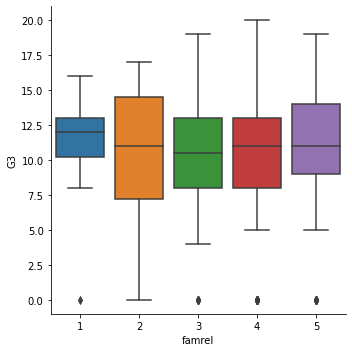

In [ ]:
sns.catplot(x="famrel",y="G3", kind="box",data=df_math)

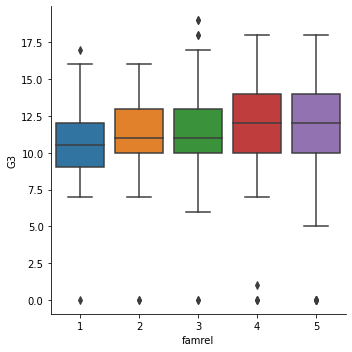

In [ ]:
sns.catplot(x="famrel",y="G3", kind="box",data=df_port)

---

# 3.25 - Features - Free time

*This feature seems to have more divergent data from the amount of time the student have and the grade.*

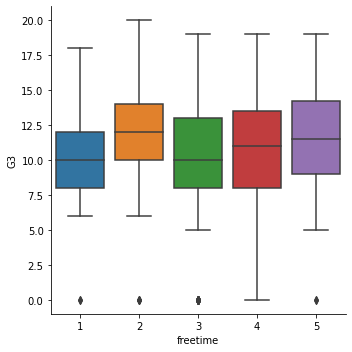

In [ ]:
sns.catplot(x="freetime",y="G3", kind="box",data=df_math)

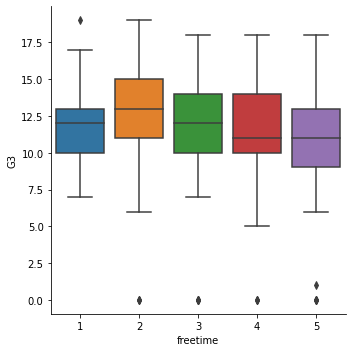

In [ ]:
sns.catplot(x="freetime",y="G3", kind="box",data=df_port)

---

# 3.26 - Features - Going Out

*It seems that there's a trade-off between the time spent out. Higher minutes out mean a worse grade, but less minutes also means a worse grade. An average time has a higher grade*

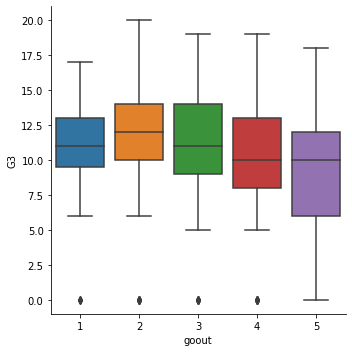

In [ ]:
sns.catplot(x="goout",y="G3", kind="box",data=df_math)

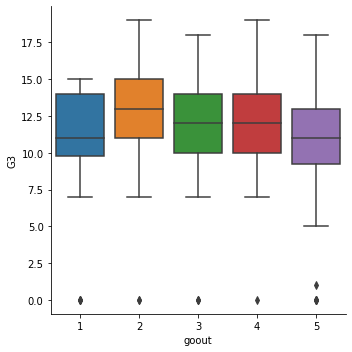

In [ ]:
sns.catplot(x="goout",y="G3", kind="box",data=df_port)

---

# 3.27 - Features - Workday consumption of alchool

*In portuguese, it's clear that the performance decreases, while in math is more confuse*
but we keep this feature

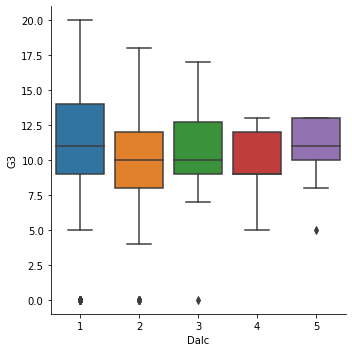

In [ ]:
sns.catplot(x="Dalc",y="G3", kind="box",data=df_math)

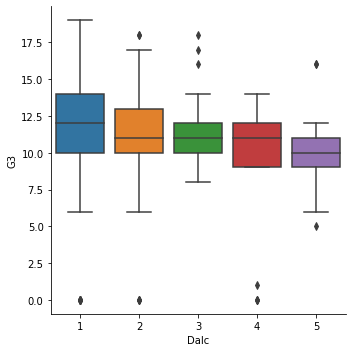

In [ ]:
sns.catplot(x="Dalc",y="G3", kind="box",data=df_port)

---

# 3.28 - Features - Weekend consumption of alchool

*This feature is more precise, the mean grade decreases after a certain amount of alcohol consumption during the weekend.*
*Keep Walc feature, but edit (1-2,3-5) for Math and (1-3, 4-5) for Portuguese.*

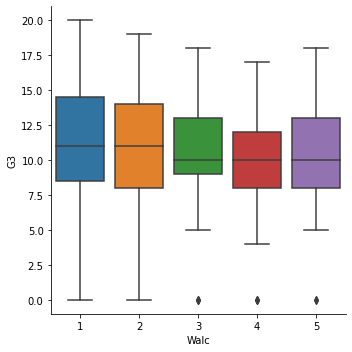

In [ ]:
sns.catplot(x="Walc",y="G3", kind="box",data=df_math)

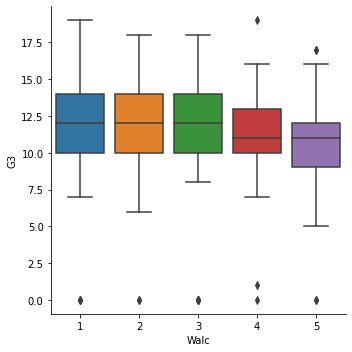

In [ ]:
sns.catplot(x="Walc",y="G3", kind="box",data=df_port)

---

# 3.29 - Features - Health

*Strangely, students with very bad health status have a higher grade.*

*For this reason, we keep this feature, but group the values together as the range 2-4 for Math and 2-3 for Portuguese have very close values.*

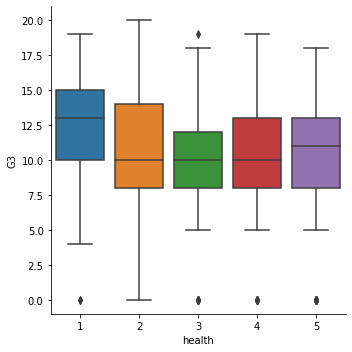

In [ ]:
sns.catplot(x="health",y="G3", kind="box",data=df_math)

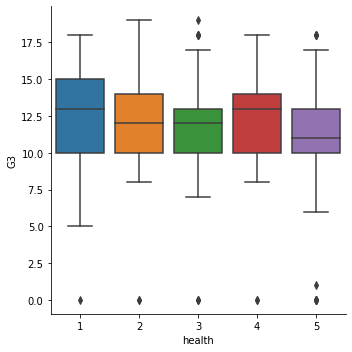

In [ ]:
sns.catplot(x="health",y="G3", kind="box",data=df_port)

---

# 3.30 - Features - Absences

the data have no clear view so we will optmizing it to visualizing it more clear and effecient



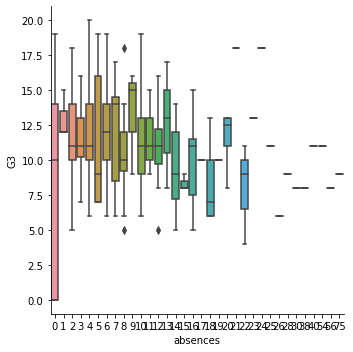

In [ ]:
sns.catplot(x="absences",y="G3", kind="box",data=df_math)

 * After optmizing the absences band, we can see how the grade decreases as students are more absent

* * *optmizing the absences band in math*

In [ ]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_math['absencesband'] = pd.cut(df_math['absences'],10, duplicates='drop')

In [ ]:
df_math['absencesband'].unique()

[(-0.075, 7.5], (7.5, 15.0], (15.0, 22.5], (22.5, 30.0], (52.5, 60.0], (67.5, 75.0], (37.5, 45.0]]
Categories (10, interval[float64, right]): [(-0.075, 7.5] < (7.5, 15.0] < (15.0, 22.5] <
                                            (22.5, 30.0] ... (45.0, 52.5] < (52.5, 60.0] <
                                            (60.0, 67.5] < (67.5, 75.0]]

In [ ]:
df_math[['absencesband','G3']].groupby(df_math['absencesband'],as_index=False).count()

,absencesband,G3
0,287,287
1,75,75
2,22,22
3,6,6
4,0,0
5,2,2
6,0,0
7,2,2
8,0,0
9,1,1


In [ ]:
df_math.loc[df_math['absences'] <= 15, 'absences' ] = 0
df_math.loc[(df_math['absences'] > 15) & (df_math['absences'] <= 23), 'absences' ] = 1
df_math.loc[df_math['absences'] > 23, 'absences' ] = 2

## Where 0 is equivalent to less than 15 absences
## 1 is equivalent to less than 23 absences and more than 15
## 3 is equivalent to more than 23


In [ ]:
df_math[['absences','G3']].groupby(df_math['absences'],as_index=False).count()

,absences,G3
0,362,362
1,23,23
2,10,10


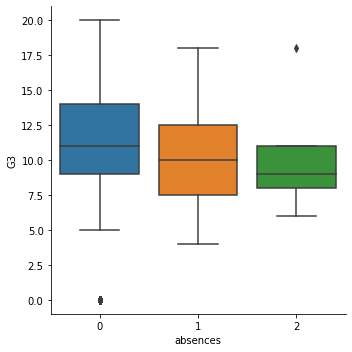

In [ ]:
sns.catplot(x="absences",y="G3", kind="box",data=df_math)

* *  *optmizing the absences band in portuguese*

          *Edit into a absencesband feature*



In [ ]:
# df_port = pd.read_csv("student-por.csv")
# df_port.head()
df_port['absencesband'] = pd.cut(df_port['absences'],8, duplicates='drop')
df_port['absencesband'].unique()

[(-0.032, 4.0], (4.0, 8.0], (8.0, 12.0], (12.0, 16.0], (20.0, 24.0], (28.0, 32.0], (16.0, 20.0], (24.0, 28.0]]
Categories (8, interval[float64, right]): [(-0.032, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0] <
                                           (16.0, 20.0] < (20.0, 24.0] < (24.0, 28.0] <
                                           (28.0, 32.0]]

In [ ]:
df_port[['absencesband','G3']].groupby(df_port['absencesband'],as_index=False).count()

,absencesband,G3
0,466,466
1,106,106
2,45,45
3,21,21
4,3,3
5,5,5
6,1,1
7,2,2


In [ ]:
df_port.loc[df_port['absences'] <= 4, 'absences' ] = 0
df_port.loc[(df_port['absences'] > 4) & (df_port['absences'] <= 8), 'absences' ] = 1
df_port.loc[(df_port['absences'] > 8) & (df_port['absences'] <= 12), 'absences' ] = 2
df_port.loc[df_port['absences'] > 12, 'absences' ] = 3

In [ ]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absencesband
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,0,0,11,11,"(-0.032, 4.0]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,0,9,11,11,"(-0.032, 4.0]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,1,12,13,12,"(4.0, 8.0]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,"(-0.032, 4.0]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,"(-0.032, 4.0]"


In [ ]:
df_port[['absences','G3']].groupby(df_port['absences'],as_index=False).count()

,absences,G3
0,466,466
1,106,106
2,45,45
3,32,32


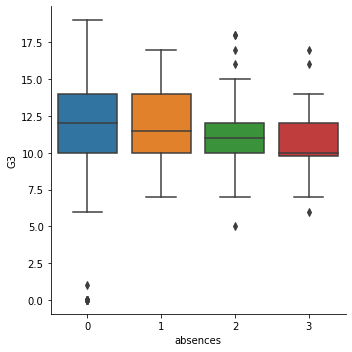

In [ ]:
sns.catplot(x="absences",y="G3", kind="box",data=df_port)

---
---

## Remove the features

Remove in Math: school, famsize, Pstatus, reason, famsup, paid, activities, nursery, romantic, famrel, absencesband

Remove in Portuguese: famsize, Pstatus, reason, famsup, paid, activities, nursery, romantic, famrel, absencesband 


In [ ]:
df_math = pd.read_csv("student-mat.csv")
df_port = pd.read_csv("student-por.csv")

In [ ]:
list_math = ['famsize', 'Pstatus' ,'reason', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'famrel', 'absencesband']
list_port = ['famsize', 'Pstatus','reason', 'famsup', 'paid', 'activities','nursery' ,'romantic', 'famrel', 'absencesband']

In [ ]:
def remove_math_features(list_features):
    for i in list_features:
        df_math.drop(i,axis=1, inplace=True)
    return print("Features removed") 

In [ ]:
def remove_port_features(list_features):
    for i in list_features:
        df_port.drop(i,axis=1, inplace=True)
    return print("Features removed")    

In [ ]:
remove_math_features(list_math)

Features removed


In [ ]:
remove_port_features(list_port)

Features removed


In [ ]:
df_math.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,at_home,teacher,mother,2,...,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,1,1,at_home,other,father,1,...,yes,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,1,1,at_home,other,mother,1,...,yes,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,4,2,health,services,mother,1,...,yes,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,3,3,other,other,father,1,...,no,3,2,1,2,5,4,6,10,10


In [ ]:
df_port.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,at_home,teacher,mother,2,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,at_home,other,father,1,...,yes,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,at_home,other,mother,1,...,yes,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,health,services,mother,1,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,other,other,father,1,...,no,3,2,1,2,5,0,11,13,13


In [ ]:
df_math.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_port.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
## We'll now convert the categorical features into numerical features.
## We'll also group some numerical categories, as several different numerical features does not have a impact in the grade.

# Edit Math: 
	Age = '15-16'=0; '17'=1; '18'=2; '19'=3; '20'=4; '21'=5; '22'=6
	Medu = '1 & 3' = 1; '2'=2; '4'=3
	Fedu = '1 & 3' = 1; '2'=2; '4'=3
	Mjob = 'at_home'= 0; 'health'=1; 'other, services, teacher'=2
	Fjob = 'teacher'= 0; 'other, services, health, at_home'=1
	guardian = 'mother, father'=0; 'other=1'
	traveltime = '1'=0; '2,3,4'=1
	studytime = '1'=0; '2'=1; '3,4'=2
	failures = '2,3'=2
	freetime = '1'=0; '2'=1; '3'=2; '4,5'=3
	goout = '1'=0; '2'=1,'3'=2; '4,5'=3
	Dalc = '1'=0; '2,3'=1,'4'=2; '5'=3
	Walc = '1,2'=0; '3,4,5'=1
	health = '1'=0; '2,3,4'=1; '5'=2

# Edit Portuguese: 
    Age = '15-18'=0 ; '19'=1; '20'=2; '21'=3; '22'=4
	Medu =  '0-1'=0; '2-3'=1; '4'=2
	Fedu = '0-1'=0; '2-3'=1; '4'=2
	Mjob = 'at_home'= 0; 'health'=1; 'other, services'=2; 'teacher'=3
	Fjob = 'teacher'= 0; 'other, services, health'=1; 'at_home'=2
	guardian = 'mother, father'=0; 'other=1'
	traveltime = '1'=0; '2,3,4'=1
	studytime = '1'=0; '2'=1; '3,4'=2
	freetime = '1'=0; '2'=1; '3'=2; '4,5'=3
	goout = '1'=0; '2'=1,'3,4'=2; '5'=3
	Dalc = '1'=0; '2,3,4'=1; '5'=2
	Walc = '1,2,3'=0; '4,5'=1
	health = '1 & 4'=0; '2,3'=1; '5'=2	

In [ ]:
df_math['sex'] = df_math['sex'].map({'M':0,'F':1})
df_port['sex'] = df_port['sex'].map({'M':0,'F':1})

df_math['address'] = df_math['address'].map({'U':1,'R':0})
df_port['address'] = df_port['address'].map({'U':1,'R':0})

df_math['age'] = df_math['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
df_port['age'] = df_port['age'].map({15:3, 16:3, 17:3, 18:3, 19:1, 20:3, 21:2, 22:0})

df_math['Medu'] = df_math['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
df_port['Medu'] = df_port['Medu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

df_math['Fedu'] = df_math['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
df_port['Fedu'] = df_port['Fedu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

df_math['Mjob'] = df_math['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
df_port['Mjob'] = df_port['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':2})

df_math['Fjob'] = df_math['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
df_port['Fjob'] = df_port['Fjob'].map({'at_home':0, 'health':1, 'other':1, 'services':1, 'teacher':2})

df_math['guardian'] = df_math['guardian'].map({'mother':1, 'father':1, 'other':0})
df_port['guardian'] = df_port['guardian'].map({'mother':1, 'father':1, 'other':0})

df_math['traveltime'] = df_math['traveltime'].map({1:0, 2:1, 3:1, 4:1})
df_port['traveltime'] = df_port['traveltime'].map({1:0, 2:1, 3:1, 4:1})

df_math['studytime'] = df_math['studytime'].map({1:0, 2:1, 3:2, 4:2})
df_port['studytime'] = df_port['studytime'].map({1:0, 2:1, 3:2, 4:2})

###
df_math['failures'] = df_math['failures'].map({0:0, 1:1, 2:2, 3:2})
df_math['failures'] = df_port['failures'].map({0:0, 1:1, 2:2, 3:2})


df_math['schoolsup'] = df_math['schoolsup'].map({'no':1, 'yes':0})
df_port['schoolsup'] = df_port['schoolsup'].map({'no':1, 'yes':0})

# df_port['nursery'] = df_port['nursery'].map({'no':0, 'yes':1})

df_math['higher'] = df_math['higher'].map({'no':0, 'yes':1})
df_port['higher'] = df_port['higher'].map({'no':0, 'yes':1})

df_math['internet'] = df_math['internet'].map({'no':0, 'yes':1})
df_port['internet'] = df_port['internet'].map({'no':0, 'yes':1})

df_math['freetime'] = df_math['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
df_port['freetime'] = df_port['freetime'].map({1:1, 2:2, 3:1, 4:0, 5:0})

df_math['goout'] = df_math['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
df_port['goout'] = df_port['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})

df_math['Dalc'] = df_math['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})
df_port['Dalc'] = df_port['Dalc'].map({1:1, 2:1, 3:1, 4:1, 5:0})

df_math['Walc'] = df_math['Walc'].map({1:1, 2:1, 3:0, 4:0, 5:0})
df_port['Walc'] = df_port['Walc'].map({1:1, 2:1, 3:1, 4:0, 5:0})

df_math['health'] = df_math['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})
df_port['health'] = df_port['health'].map({1:3, 2:1, 3:1, 4:2, 5:0})

df_math['G3'] = df_math['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})
df_port['G3'] = df_port['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})

In [ ]:
features_math = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']
features_port = [ 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'failures','schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']

targets = ['G3']

In [ ]:
df_math[features_math].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   Medu        395 non-null    int64
 4   Fedu        395 non-null    int64
 5   Mjob        395 non-null    int64
 6   Fjob        395 non-null    int64
 7   guardian    395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int64
 12  higher      395 non-null    int64
 13  internet    395 non-null    int64
 14  freetime    395 non-null    int64
 15  goout       395 non-null    int64
 16  Dalc        395 non-null    int64
 17  Walc        395 non-null    int64
 18  health      395 non-null    int64
 19  absences    395 non-null    int64
 20  G1          395 non-null    int6

In [ ]:
df_port[features_port].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         649 non-null    int64
 1   age         649 non-null    int64
 2   address     649 non-null    int64
 3   Medu        649 non-null    int64
 4   Fedu        649 non-null    int64
 5   Mjob        649 non-null    int64
 6   Fjob        649 non-null    int64
 7   guardian    649 non-null    int64
 8   traveltime  649 non-null    int64
 9   studytime   649 non-null    int64
 10  failures    649 non-null    int64
 11  schoolsup   649 non-null    int64
 12  higher      649 non-null    int64
 13  internet    649 non-null    int64
 14  freetime    649 non-null    int64
 15  goout       649 non-null    int64
 16  Dalc        649 non-null    int64
 17  Walc        649 non-null    int64
 18  health      649 non-null    int64
 19  absences    649 non-null    int64
 20  G1          649 non-null    int6

---
---
---
4- **Apply the algorithm** you choose on the dataset and use the generated model to **make some
predictions.**

5- **Evaluate** the generated model.



# Applying the Algorithm

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics

In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_math[features_math],df_math[targets], test_size=0.01, random_state=0)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_port[features_port],df_port[targets], test_size=0.01, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xm_train = sc.fit_transform(Xm_train)
Xm_test = sc.transform(Xm_test)

In [ ]:
sc2 = StandardScaler()
Xp_train = sc2.fit_transform(Xp_train)
Xp_test = sc2.transform(Xp_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

print("FOR MATH: \n")

classifier = LogisticRegression()
classifier.fit(Xm_train, ym_train.values.ravel())
Ym_pred = classifier.predict(Xm_test)
print(accuracy_score(ym_test.values.ravel(), Ym_pred))


FOR MATH: 

1.0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

print("FOR PORTUGUESE: \n")

classifier = LogisticRegression()
classifier.fit(Xp_train, yp_train.values.ravel())
Yp_pred = classifier.predict(Xp_test)
print(accuracy_score(yp_test.values.ravel(), Yp_pred))


FOR PORTUGUESE: 

1.0


this result not seems in logic at all !!!!!

---
---
6- To enhance results, try to **tune some of the algorithm parameters** then use the same evaluation
techniques to see if you get better results.

# enhance results



In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_math[features_math],df_math[targets], test_size=0.30, random_state=0)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_port[features_port],df_port[targets], test_size=0.40, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xm_train = sc.fit_transform(Xm_train)
Xm_test = sc.transform(Xm_test)

In [ ]:
sc2 = StandardScaler()
Xp_train = sc2.fit_transform(Xp_train)
Xp_test = sc2.transform(Xp_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

print("FOR MATH: \n")

classifier = LogisticRegression()
classifier.fit(Xm_train, ym_train.values.ravel())
Ym_pred = classifier.predict(Xm_test)
print(accuracy_score(ym_test.values.ravel(), Ym_pred))


FOR MATH: 

0.865546218487395


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

print("FOR PORTUGUESE: \n")

classifier = LogisticRegression()
classifier.fit(Xp_train, yp_train.values.ravel())
Yp_pred = classifier.predict(Xp_test)
print(accuracy_score(yp_test.values.ravel(), Yp_pred))


FOR PORTUGUESE: 

0.9307692307692308


now that looks logicly 👍

created by ola,sana,rama  😊✌️

---

